# Test IOD Index Calculations

In [1]:
import sys
sys.path.append('../')
import helpers.fileHandler as fh
import helpers.cvdpTime as cvdpTime
import pandas
import xarray

First load up the cvdp and figure out which indexes we want to calculate

In [2]:
cvdp = fh.loadModelData('CESM-LME', 'cvdp_data', '001', decode_times=False)

['/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/cesm1.lm.cvdp_data/b.e11.BLMTRC5CN.f19_g16.001.cvdp_data.850-2005.nc']


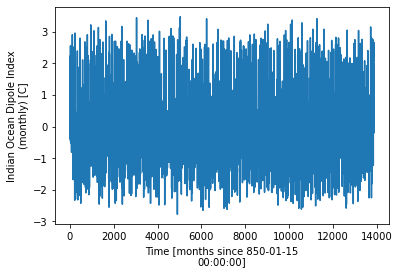

In [3]:
iodCvdp = cvdp.indian_ocean_dipole
del cvdp

#just plot something for sanity
iodCvdp.plot()

In [4]:
iodCvdp

<xarray.DataArray 'indian_ocean_dipole' (time: 13872)>
dask.array<open_dataset-bd16e4c5c6d38b3de29edae98a4a79b1indian_ocean_dipole, shape=(13872,), dtype=float32, chunksize=(13872,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 1.387e+04 1.387e+04 1.387e+04
Attributes:
    comment_cvdp:  area average domain (-10:10N, 50:70E) - (-10:0N, 90:110E)
    units:         C
    long_name:     Indian Ocean Dipole Index (monthly)

In [5]:
iodCvdp.time.units



'months since 850-01-15 00:00:00'

In [6]:
len(iodCvdp.time)

13872

In [46]:
months=pandas.period_range('0850-01-15', periods=13872, freq='M')

In [48]:
months.to_series

<bound method Index.to_series of PeriodIndex(['0850-01', '0850-02', '0850-03', '0850-04', '0850-05', '0850-06',
             '0850-07', '0850-08', '0850-09', '0850-10',
             ...
             '2005-03', '2005-04', '2005-05', '2005-06', '2005-07', '2005-08',
             '2005-09', '2005-10', '2005-11', '2005-12'],
            dtype='period[M]', length=13872, freq='M')>

In [42]:
months

AttributeError: 'PeriodIndex' object has no attribute 'data'

In [49]:
iodCvdp.assign_coords({'months':months.to_series})

ValueError: cannot add coordinates with new dimensions to a DataArray

In [ ]:
months[:]assign_coords

In [ ]:
iodCvdp = cvdpTime.decode(iodCvdp)